In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices
import sklearn
import seaborn as sns

In [2]:
dataframe=pd.read_csv("IBM_Attrition_Data.csv")

In [3]:
dataframe.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [4]:
dataframe.isnull().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

In [7]:
names = dataframe.columns.values 
print(names)

['Age' 'Attrition' 'Department' 'DistanceFromHome' 'Education'
 'EducationField' 'EnvironmentSatisfaction' 'JobSatisfaction'
 'MaritalStatus' 'MonthlyIncome' 'NumCompaniesWorked' 'WorkLifeBalance'
 'YearsAtCompany']


# 1. Find the age distribution of employees in IBM

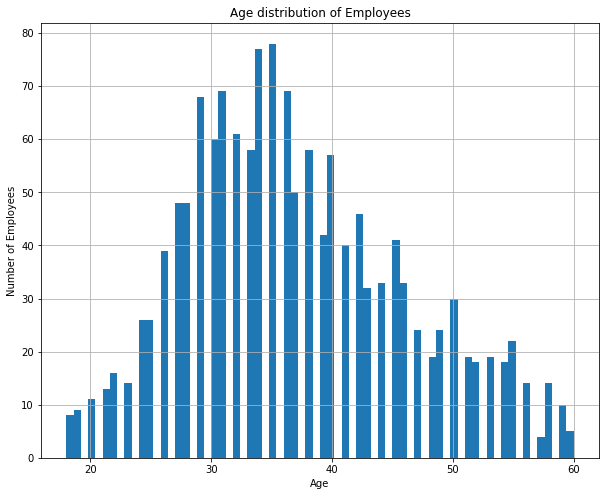

In [5]:
# histogram for age
plt.figure(figsize=(10,8))
dataframe['Age'].hist(bins=70)
plt.title("Age distribution of Employees")
plt.xlabel("Age")
plt.ylabel("Number of Employees")
plt.show()

# 2. Explore Attrition by Age

C:\Users\ST\AppData\Local\Temp\ipykernel_8276\787676741.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis='y')


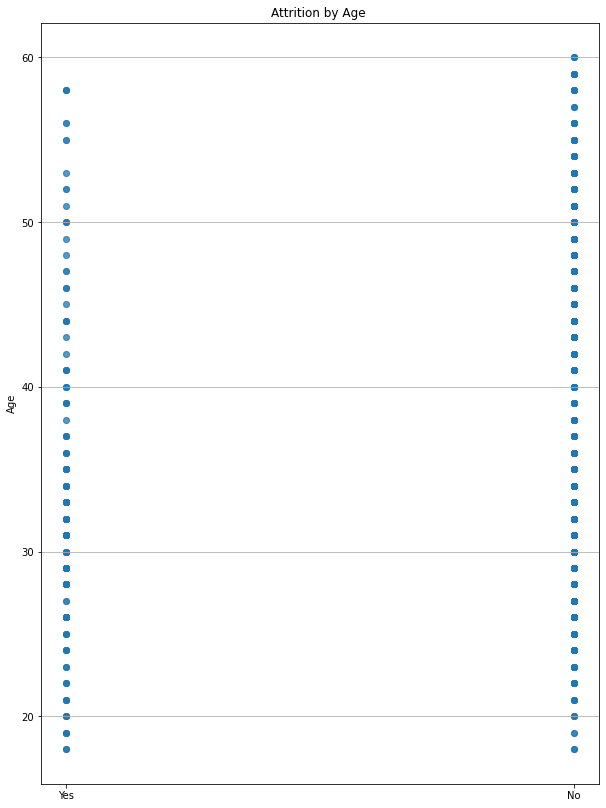

In [23]:
plt.figure(figsize=(10,14))
plt.scatter(dataframe.Attrition,dataframe.Age, alpha=.5)
plt.title("Attrition by Age ")
plt.ylabel("Age")
plt.grid(b=True, which='major',axis='y')
plt.show()

# 3. Explore data for Left employees

In [17]:
attrition_count = pd.DataFrame(dataframe['Attrition'].value_counts())
attrition_count

,Attrition
No,1233
Yes,237


([<matplotlib.patches.Wedge at 0x1aa76b83dc0>,
 [Text(-1.0056140220003909, 0.5578892710531344, 'No'),
  Text(0.961891673217765, -0.5336332157899547, 'Yes')])

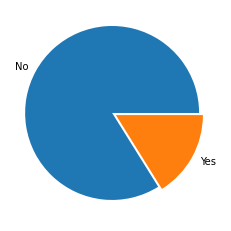

In [18]:
plt.pie(attrition_count['Attrition'],explode=(0.05,0),labels=['No' , 'Yes'])

<AxesSubplot:xlabel='Attrition', ylabel='count'>

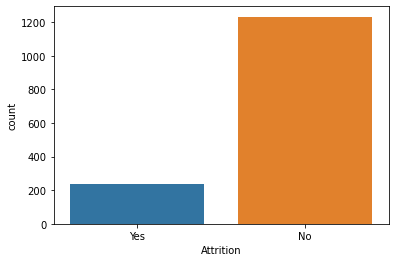

In [16]:
sns.countplot(x=dataframe['Attrition'])

# 4. Find out the distribution of employees by the education field

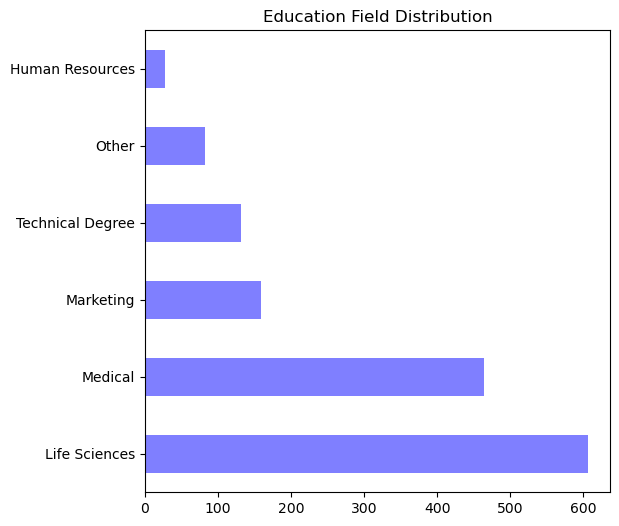

In [32]:
plt.figure(figsize=(6,6))
dataframe.EducationField.value_counts().plot(kind='barh',color='blue',alpha=.5)
plt.title("Education Field Distribution")
plt.show()

# 5. Give a bar chart for the number of married and unmarried employees

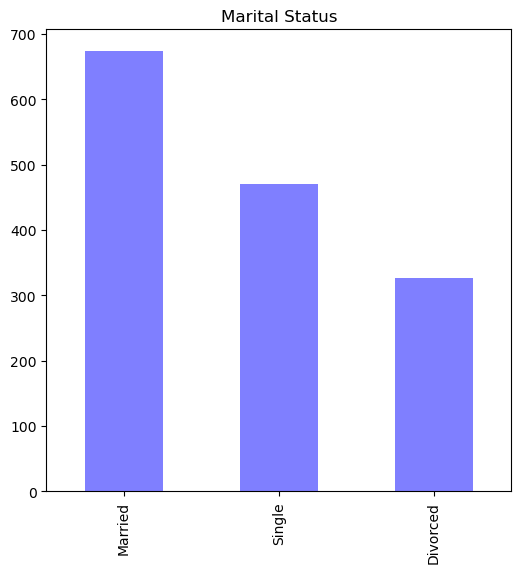

In [34]:
plt.figure(figsize=(6,6))
dataframe.MaritalStatus.value_counts().plot(kind='bar',color='blue',alpha=.5)
plt.title("Marital Status")
plt.show()

In [9]:
dataframe.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [10]:
dataframe.head(10)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
5,32,No,Research & Development,2,2,Life Sciences,4,4,Single,3068,0,2,7
6,59,No,Research & Development,3,3,Medical,3,1,Married,2670,4,2,1
7,30,No,Research & Development,24,1,Life Sciences,4,3,Divorced,2693,1,3,1
8,38,No,Research & Development,23,3,Life Sciences,4,3,Single,9526,0,3,9
9,36,No,Research & Development,27,3,Medical,3,3,Married,5237,6,2,7


# Data Preprocessing

In [34]:
#Converting String columns into integers

from sklearn.preprocessing import LabelEncoder
for column in dataframe.columns:
    if dataframe[column].dtype==np.int_:
        continue
    else:
        dataframe[column]=LabelEncoder().fit_transform(dataframe[column])

In [35]:
dataframe[column].dtype

dtype('int64')

# Model Building

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)


<AxesSubplot:>

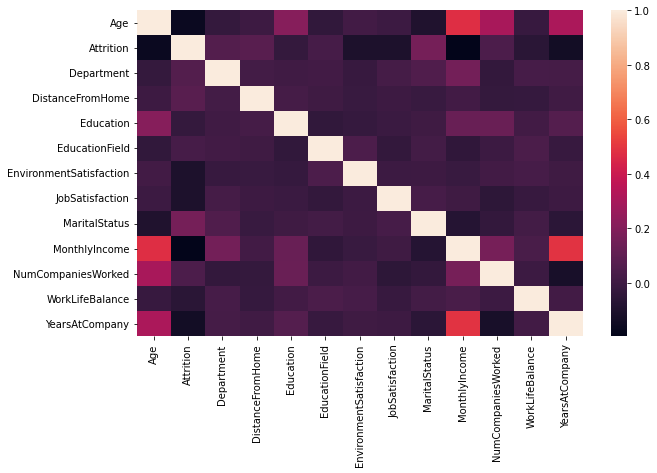

In [37]:
plt.figure(figsize = (10,6))
sns.heatmap(dataframe.corr())

In [38]:
x = dataframe.drop(columns=['Attrition'])
y = dataframe['Attrition']

In [39]:
x.columns

Index(['Age', 'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'WorkLifeBalance',
       'YearsAtCompany'],
      dtype='object')

In [40]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [33]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x, y)

DecisionTreeClassifier()

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)
x_train.head()

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
944,10,1,0,2,1,2,3,1,888,0,2,9
1402,13,1,1,0,3,3,3,0,7,1,2,1
1054,31,1,6,3,1,2,1,0,1100,3,2,8
1128,18,1,5,3,1,0,0,1,759,3,2,3
1323,10,0,0,1,1,2,3,0,253,1,2,3


In [42]:
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [43]:
rf.score(x_train, y_train)

0.9764065335753176

In [44]:
pred = rf.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.8396739130434783